In [1]:
import numpy as np
import pandas as pd

print("MODULES LOADED")

MODULES LOADED


In [2]:
# In this script, we'll import a CSV, extract the headers, and do some analytics

#to import, we will use a Pandas data-frame. This is like data-frames in R. Pandas has a function called "read_csv"
#The dataset used is here https://www.kaggle.com/datasets/mhapich/true-crime-channel-statistics
df = pd.read_csv(r'data/true_crime_channel_stats.csv', parse_dates=True)

#you can uncomment this if you like, but it looks really nasty. EEk
print(df) 

#what if we just want the index, the title, and the views?
df1 = pd.DataFrame(df, columns=['Title', 'Views'])
print(df1)

       Unnamed: 0                                              Title  \
0               0  A Killer Deadlier than Hitler? Joseph Stalin P...   
1               1  His Waterbed Secrets - Life Sentence At 14?! J...   
2               2  The Mass Murderer Nobody Talks About: Joseph S...   
3               3  The Woodworking Wacko - Psychopath Cameron Hoo...   
4               4  This Bloody Crime Saved Our Lives: The Dark Hi...   
...           ...                                                ...   
10102          19  The Tragic Case of Gregory Biggs | The Windshi...   
10103          20                 The Bizarre Case of Peter Shellard   
10104          21  The Serial Killer Who Filed His Teeth Down | T...   
10105          22  The Watcher House | The Sinister Case of 657 B...   
10106          23             Santa The Slayer | The Covina Massacre   

      PublishedDate      Views    Likes  Comments  \
0        2023-05-18   277285.0  13062.0    1287.0   
1        2023-05-15  1548343.

In [3]:
#What is the most common word in the titles?
df2 = df1.assign(word = df1['Title'].str.split()).explode('word')
df2['word'] = df2['word'].str.strip(',')
df2['word'] = df2['word'].str.strip('?')
df2['word'] = df2['word'].str.strip('|')
df2['word'] = df2['word'].str.strip('.')
df2['word'] = df2['word'].str.strip(' ')
df2['word'] = df2['word'].str.strip('-')
#print(df2)
df2['word'].value_counts()

              3877
The           3025
of            2138
Case          1391
and           1294
              ... 
Richneck         1
Brudos           1
Fabricates       1
Ugly             1
Boulevard        1
Name: word, Length: 18573, dtype: int64

<Axes: xlabel='Views', ylabel='[Likes]'>

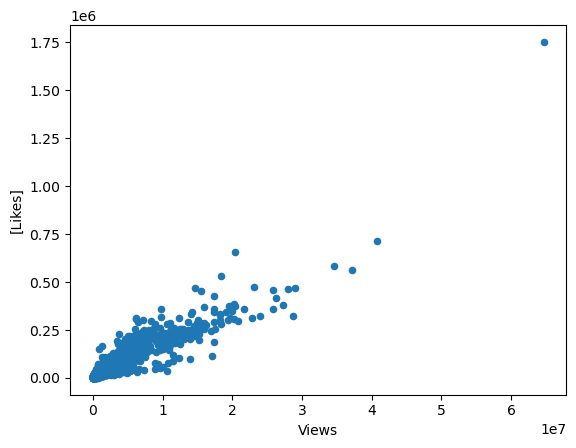

In [4]:
#Lets try to graph!
%matplotlib inline

#Basic scatterplots for Views x Likes relation. We expect a positive relationship.
df.plot(x="Views", y=["Likes"], kind="scatter")


<Axes: xlabel='Views', ylabel='[Comments]'>

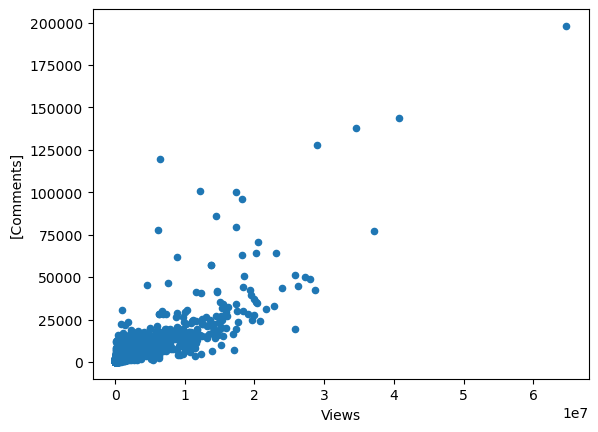

In [5]:
#What about comments?
df.plot(x="Views", y=["Comments"], kind="scatter")

<Axes: >

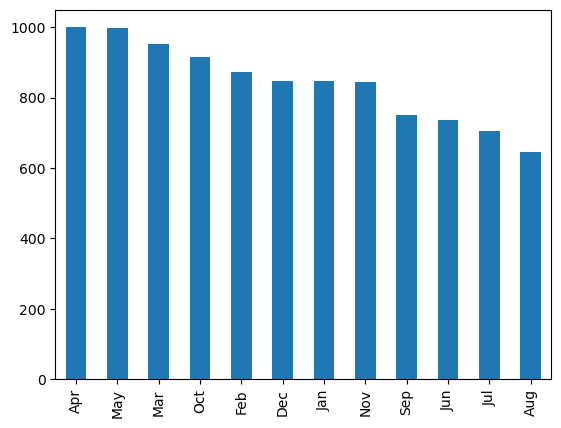

In [6]:
#What month is the most popular for releasing True Crime podcasts
df['Month'].value_counts().plot.bar()
# Looks like the answer is April, May and March. 

Text(0, 0.5, 'Count')

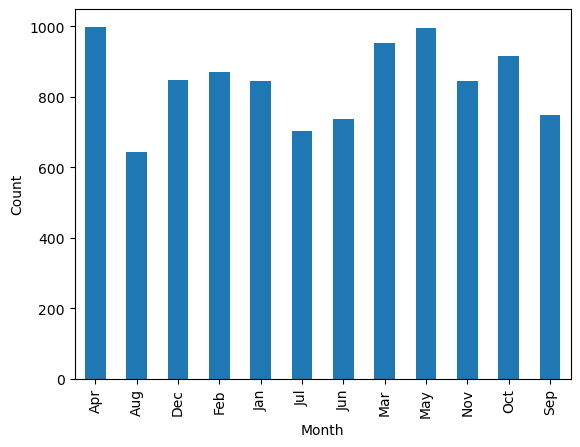

In [7]:
#What about a way to make the graph prettier?
#Instead of sorting by size, can we make it look like the yearly calendar
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mapping = {month: i for i, month in enumerate(months)}
key = df['Month'].map(mapping)
#print(key)
df.iloc[key.argsort()]
bar = df.groupby('Month').size().plot.bar()
bar.set_ylabel("Count")
#okay now we see some trends.

<Axes: xlabel='PublishedDate'>

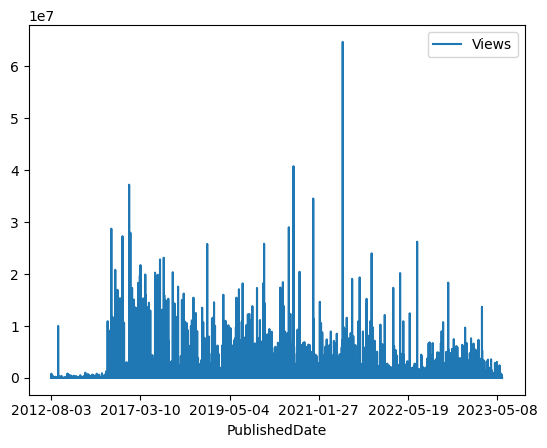

In [11]:
#Now let's try something a little different. 
#We also have the published date of each of the podcasts. 
#Let's plot those and try to see a trend

df3 = df.sort_values(by='PublishedDate')
df3.plot(x='PublishedDate', y='Views')